In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import cohen_kappa_score
from sklearn import svm, datasets
from sklearn import model_selection
import import_ipynb
from wines import *
import scipy.sparse as sparse

In [4]:
wtp_features = wines.iloc[:,:-3]
wtp_feature_names = wtp_features.columns
wtp_class_labels = np.array(wines['wine_type'])
wtp_train_X, wtp_test_X, wtp_train_y, wtp_test_y = train_test_split(wtp_features,
wtp_class_labels, test_size=0.3, random_state=42)
print(Counter(wtp_train_y), Counter(wtp_test_y))
print('Features:', list(wtp_feature_names))

Counter({'white': 3431, 'red': 1116}) Counter({'white': 1467, 'red': 483})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [5]:
 # Define the scaler
wtp_ss = StandardScaler().fit(wtp_train_X)
# Scale the train set
wtp_train_SX = wtp_ss.transform(wtp_train_X)
# Scale the test set
wtp_test_SX = wtp_ss.transform(wtp_test_X)


In [6]:
#training the set
wtp_lr = LogisticRegression()
wtp_lr.fit(wtp_train_SX, wtp_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [12]:
#testing the set
wtp_lr_predictions = wtp_lr.predict(wtp_test_SX)
print(wtp_lr_predictions)
print(classification_report(wtp_test_y,wtp_lr_predictions, target_names=['red', 'white']))
print(accuracy_score(wtp_test_y,wtp_lr_predictions))
wtp_confusion_matrix = confusion_matrix(wtp_test_y,wtp_lr_predictions)
accuracy = (wtp_confusion_matrix[0][0] + wtp_confusion_matrix[1][1]) / (wtp_confusion_matrix[0][0] + wtp_confusion_matrix[0][1] + wtp_confusion_matrix[1][0] + wtp_confusion_matrix[1][1])
print(accuracy)
print(cohen_kappa_score(wtp_test_y, wtp_lr_predictions))

['white' 'white' 'red' ... 'white' 'white' 'white']
              precision    recall  f1-score   support

         red       0.99      0.99      0.99       483
       white       1.00      1.00      1.00      1467

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950

0.9938461538461538
0.9938461538461538
0.9834876602014505


In [9]:
lb = LabelBinarizer()
binary = lb.fit_transform(wtp_test_y)
binary_wtp_lr_predictions = lb.fit_transform(wtp_lr_predictions)
precision, recall, thresholds = precision_recall_curve(binary, binary_wtp_lr_predictions)
print(precision)
print(recall)
print(thresholds)

[0.75230769 0.99591002 1.        ]
[1.         0.99591002 0.        ]
[0 1]


Feature: fixed acidity Score: -0.3279740225154824
Feature: volatile acidity Score: -1.3143761454379264
Feature: citric acid Score: 0.2061158050845901
Feature: residual sugar Score: 3.458120616095208
Feature: chlorides Score: -0.8319012230552968
Feature: free sulfur dioxide Score: -0.7525937833665273
Feature: total sulfur dioxide Score: 2.773434867550434
Feature: density Score: -3.1795040131554013
Feature: pH Score: -0.41619861459881435
Feature: sulphates Score: -0.7359063873317623
Feature: alcohol Score: -1.0642670131154675


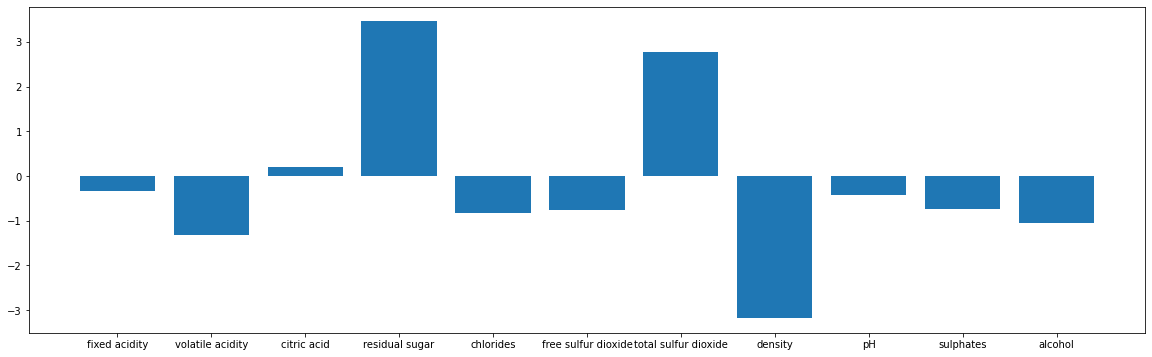

In [10]:
# get importance
importance = wtp_lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	# print('Feature: %0d, Score: %.5f' % (i,v))
    print("Feature:", wtp_feature_names[i], "Score:", v)
    
# plot feature importance
plt.figure(figsize=(20, 6))
plt.bar([x for x in wtp_feature_names], importance)
plt.show()

In [11]:
# taking the most meaningful features
wtp_features = wines.loc[:,["volatile acidity", "residual sugar", "total sulfur dioxide", "density", "alcohol"]]
wtp_feature_names = wtp_features.columns
wtp_class_labels = np.array(wines['wine_type'])
wtp_train_X, wtp_test_X, wtp_train_y, wtp_test_y = train_test_split(wtp_features,
wtp_class_labels, test_size=0.3, random_state=42)
print(Counter(wtp_train_y), Counter(wtp_test_y))
print('Features:', list(wtp_feature_names))

Counter({'white': 3431, 'red': 1116}) Counter({'white': 1467, 'red': 483})
Features: ['volatile acidity', 'residual sugar', 'total sulfur dioxide', 'density', 'alcohol']


In [12]:
 # Define the scaler
wtp_ss = StandardScaler().fit(wtp_train_X)
# Scale the train set
wtp_train_SX = wtp_ss.transform(wtp_train_X)
# Scale the test set
wtp_test_SX = wtp_ss.transform(wtp_test_X)

In [13]:
wtp_lr = LogisticRegression()
wtp_lr.fit(wtp_train_SX, wtp_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [14]:
#testing the set
wtp_lr_predictions = wtp_lr.predict(wtp_test_SX)
print(wtp_lr_predictions)
print(classification_report(wtp_test_y,wtp_lr_predictions, target_names=['red', 'white']))
print(accuracy_score(wtp_test_y,wtp_lr_predictions))
print(cohen_kappa_score(wtp_test_y, wtp_lr_predictions))

['white' 'white' 'red' ... 'white' 'white' 'white']
              precision    recall  f1-score   support

         red       0.99      0.99      0.99       483
       white       1.00      1.00      1.00      1467

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950

0.9938461538461538
0.9834876602014505


In [48]:
wtp_knn = KNeighborsClassifier(n_neighbors=3)
wtp_knn.fit(wtp_train_SX, wtp_train_y)

KNeighborsClassifier(n_neighbors=3)

In [50]:
#testing the set
wtp_knn_predictions = wtp_knn.predict(wtp_test_SX)
print(classification_report(wtp_test_y,wtp_knn_predictions, target_names=['red', 'white']))
print(accuracy_score(wtp_test_y,wtp_knn_predictions))
print(cohen_kappa_score(wtp_test_y, wtp_knn_predictions))

              precision    recall  f1-score   support

         red       0.98      0.98      0.98       483
       white       0.99      0.99      0.99      1467

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950

0.9917948717948718
0.9779835469352673


In [53]:
wtp_dt = DecisionTreeClassifier()
wtp_dt.fit(wtp_train_SX, wtp_train_y)

DecisionTreeClassifier()

In [56]:
wtp_dt_predictions = wtp_dt.predict(wtp_test_SX)
print(classification_report(wtp_test_y,wtp_dt_predictions, target_names=['red', 'white']))
print(accuracy_score(wtp_test_y,wtp_dt_predictions))
print(cohen_kappa_score(wtp_test_y, wtp_dt_predictions))

              precision    recall  f1-score   support

         red       0.97      0.96      0.97       483
       white       0.99      0.99      0.99      1467

    accuracy                           0.98      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.98      0.98      0.98      1950

0.9835897435897436
0.9557211282597127


In [58]:
wtp_rf = RandomForestClassifier()
wtp_rf.fit(wtp_train_SX, wtp_train_y)

RandomForestClassifier()

In [59]:
wtp_rf_predictions = wtp_rf.predict(wtp_test_SX)
print(classification_report(wtp_test_y,wtp_rf_predictions, target_names=['red', 'white']))
print(accuracy_score(wtp_test_y,wtp_rf_predictions))
print(cohen_kappa_score(wtp_test_y, wtp_rf_predictions))

              precision    recall  f1-score   support

         red       0.98      0.98      0.98       483
       white       0.99      0.99      0.99      1467

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950

0.9907692307692307
0.9751970456925536


In [71]:
wtp_svm = svm.SVC()
wtp_svm.fit(wtp_train_SX, wtp_train_y)

SVC()

In [72]:
wtp_svm_predictions = wtp_svm.predict(wtp_test_SX)
print(classification_report(wtp_test_y,wtp_svm_predictions, target_names=['red', 'white']))
print(accuracy_score(wtp_test_y,wtp_svm_predictions))
print(cohen_kappa_score(wtp_test_y, wtp_svm_predictions))

              precision    recall  f1-score   support

         red       0.99      0.99      0.99       483
       white       1.00      1.00      1.00      1467

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950

0.9943589743589744
0.9848531710892583


In [73]:
seed = 7
models = []

models.append(("LR", wtp_lr))
models.append(("KNN", wtp_knn))
models.append(("DT", wtp_dt))
models.append(("RF", wtp_rf))
models.append(("SVM", wtp_svm))


LR: 0.992743 (0.003116)
KNN: 0.991203 (0.004289)
DT: 0.985045 (0.003655)
RF: 0.992303 (0.003441)
SVM: 0.994501 (0.002828)


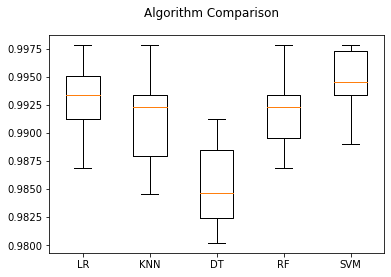

In [74]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    #n_splits is the number of times the model perform a training and a testing during cross validation
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, wtp_train_SX, wtp_train_y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()